Importing my modules

In [1]:
import pandas as pd
import numpy as np
import os 
import datetime as dt
import matplotlib.pyplot as plt
from numpy import random




Read my data

In [3]:
sales=pd.read_excel('Loripart 2024.xlsx',index_col='date')
sales.head()

,product,amount
date,,
2024-01-02,pistons cxz,12000
2024-01-02,pinion fridge txd,5000
2024-01-02,springs txd,5600
2024-01-03,springs cxz,6000
2024-01-03,drum cxz,10000


Glimpse of my data

In [4]:
sales.columns

Index(['product', 'amount'], dtype='object')

In [5]:
sales.describe()

,amount
count,1990.000000
mean,5508.391960
std,7124.310798
min,200.000000
25%,2500.000000
50%,4000.000000
75%,6000.000000
max,90000.000000


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1990 entries, 2024-01-02 to 2024-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  1990 non-null   object
 1   amount   1990 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.6+ KB


Checking for Missing Values

In [7]:
sales.isnull()

,product,amount
date,,
2024-01-02,False,False
2024-01-02,False,False
2024-01-02,False,False
2024-01-03,False,False
2024-01-03,False,False
...,...,...
2024-12-31,False,False
2024-12-31,False,False
2024-12-31,False,False


Compute Total sales per month

In [18]:
#using resample
month_res=sales.resample('ME')
tot_sales_per_month=month_res['amount'].sum()
print(tot_sales_per_month)

date
2024-01-31     622600
2024-02-29     860100
2024-03-31     780950
2024-04-30    1054200
2024-05-31     795500
2024-06-30     974300
2024-07-31    1059500
2024-08-31    1076000
2024-09-30    1045800
2024-10-31     977300
2024-11-30     901500
2024-12-31     813950
Freq: ME, Name: amount, dtype: int64


In [17]:
#sort values
tot_sales_per_month.sort_values(ascending=False)

date
2024-08-31    1076000
2024-07-31    1059500
2024-04-30    1054200
2024-09-30    1045800
2024-10-31     977300
2024-06-30     974300
2024-11-30     901500
2024-02-29     860100
2024-12-31     813950
2024-05-31     795500
2024-03-31     780950
2024-01-31     622600
Name: amount, dtype: int64

                      product  amount  month
date                                        
2024-01-02        pistons cxz   12000      1
2024-01-02  pinion fridge txd    5000      1
2024-01-02        springs txd    5600      1
2024-01-03        springs cxz    6000      1
2024-01-03           drum cxz   10000      1


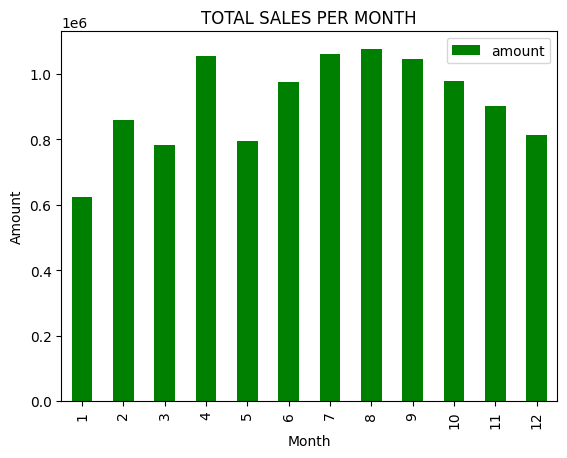

In [24]:
##using groupby
sales['month']=sales.index.month
print(sales.head())

month_grp=sales.groupby(['month'])
tot_per_month=month_grp['amount'].sum()
tot_per_month_plot=tot_per_month.plot(kind='bar',xlabel='Month',ylabel='Amount',title='TOTAL SALES PER MONTH',color='green')
plt.legend()


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

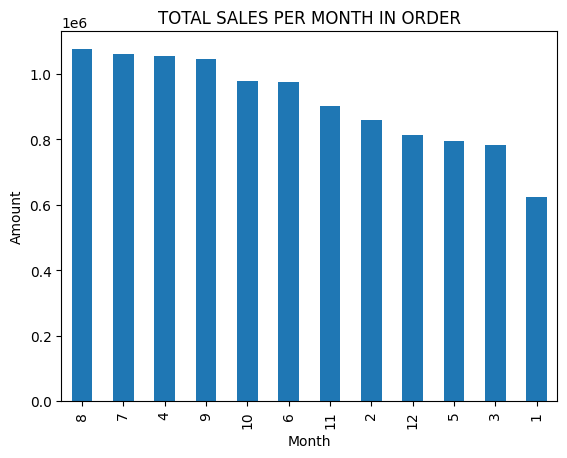

In [22]:
##total sales per month in order
tot_per_month_order=month_grp['amount'].sum().sort_values(ascending=False)
tot_per_month_order_plot=tot_per_month_order.plot(kind='bar',xlabel='Month',ylabel='Amount',title='TOTAL SALES PER MONTH IN ORDER')
plt.legend

Maximum and Average sales per Month

In [25]:
max_per_month=month_grp['amount'].max()
print(max_per_month)

average_sales=month_grp['amount'].mean()
print(average_sales)

average_sales.mean()

month
1     21000
2     72000
3     74000
4     75000
5     27000
6     70000
7     65000
8     90000
9     50000
10    40000
11    29500
12    70000
Name: amount, dtype: int64
month
1     4980.800000
2     6667.441860
3     5071.103896
4     6981.456954
5     4571.839080
6     5473.595506
7     5547.120419
8     6044.943820
9     5504.210526
10    5282.702703
11    5036.312849
12    5217.628205
Name: amount, dtype: float64


np.float64(5531.5963182225605)

In [28]:
#annual average
tots=sales['amount'].sum()
print(tots)
months=12
average=tots/months
average

10961700


np.float64(913475.0)

In [27]:
# max amount with associated product
# Create a list of the max amounts
max_amounts = [21000,72000,74000,75000,27000,70000,65000,90000,50000,40000,29500,70000]

# Filter rows where 'amount' matches any of the max values
# This assumes one unique max amount per month
max_rows = sales[sales['amount'].isin(max_amounts)]
max_rows

# Optional: sort by month
#max_rows = max_rows.sort_values(by='Month')

#print(max_rows[['Month', 'Product', 'Amount']])


,product,amount,month
date,,,
2024-01-04,propeller cxz,21000,1
2024-02-03,front axle frr,40000,2
2024-02-13,diff frr,72000,2
2024-02-26,diff frr,65000,2
2024-03-07,front axle fh,74000,3
2024-03-23,hub + drum cxz,21000,3
2024-04-03,front axle frr,75000,4
2024-04-04,front axle cxz,40000,4
2024-04-13,gear box fvr bal,40000,4


Frequently sold Products

In [29]:
frequent_products=sales['product'].value_counts()
frequent_products.head(50)


product
springs cxz          91
bearing              72
spring h frr         60
springs txd          60
spring h fh          58
spring cxz           48
spring txd           46
spring f main cxz    42
spring h txd         38
jembe frr            37
spring r main cxz    37
hanger txd           36
jembe txd            25
axle frr             23
gatembe fh           20
spring f main txd    19
hanger frr           19
spring h fvr         18
bearing              18
rim txd              17
spring r main txd    16
spring h fsr         14
spring seat cxz      14
bearings             14
adjuster cxz         14
drum frr             13
swinger txd          13
springs frr          12
universal cxz        12
springs fvr          12
gatembe txd          11
shoe fsr             10
gatembe cxz           9
bearing txd           9
axle fh               8
springs fh            8
bearing fsr           8
spring fh             8
hub frr rear          7
axle txd              7
drum cxz              7
spring f

In [30]:
def frequent_sales_total(df, product):
    """
    Calculate total sales amount for a specific product.

    Parameters:
    - df: pandas DataFrame with 'product' and 'amount' columns
    - product: string or keyword to search in the 'product' column

    Returns:
    - Total amount generated by the brand
    """
    products_dict={}
    for product in products:
        fil = df['product'].str.contains(product, case=False, na=False)
        tots= df.loc[fil, 'amount'].sum()
        products_dict[product]=tots
    return pd.Series(products_dict).sort_values(ascending=False)

products=['spring','springs','hanger txd','jembe frr','jembe txd','axle frr','gatembe fh','bearing']

freq_sales=frequent_sales_total(sales,products)
print(freq_sales)

spring        3035700
springs       1142600
axle frr       542500
bearing        377100
hanger txd     146000
gatembe fh     135000
jembe frr       98200
jembe txd       73900
dtype: int64


Top selling Products

In [32]:
top_sales = sales.groupby('product')['amount'].sum().sort_values(ascending=False)
print(top_sales)

top_sales.head(10)

product
springs cxz          569200
axle frr             312500
diff frr             277000
springs txd          261000
spring r main cxz    244700
                      ...  
grease cup fh           500
wheel nuts txd          300
spring pin txd          200
bajol                   200
bolt                    200
Name: amount, Length: 619, dtype: int64


product
springs cxz          569200
axle frr             312500
diff frr             277000
springs txd          261000
spring r main cxz    244700
spring f main cxz    204500
front axle fh        194000
front axle frr       185000
spring cxz           183300
spring h frr         177800
Name: amount, dtype: int64

Best selling car brand

In [33]:
def count_matching_strings(df, column, keywords):
    """
    Count how many times each keyword appears in a column.

    Parameters:
    - df: pandas DataFrame
    - column: name of the column to search
    - keywords: list of strings to search for (case-insensitive)

    Returns:
    - pandas Series with keyword as index and counts as values
    """
    counts = {}
    for keyword in keywords:
        match = df[column].str.contains(keyword, case=True, na=False)
        counts[keyword] = match.sum()
    return pd.Series(counts).sort_values(ascending=False)



keywords=['txd','cxz','tata','frr','fh','igogo','toyota','nqr','fuso','fvz','fighter','canter','hino','faw']

best_selling_brand=count_matching_strings(sales,'product',keywords)
print(best_selling_brand)



cxz        525
txd        458
frr        330
fh         204
fuso        54
fvz         24
fighter     19
nqr         14
igogo        4
tata         4
faw          3
canter       3
toyota       2
hino         2
dtype: int64


<Axes: title={'center': 'Best selling Vehicle Brand'}, xlabel='Vehicle Brand', ylabel='No of Entries'>

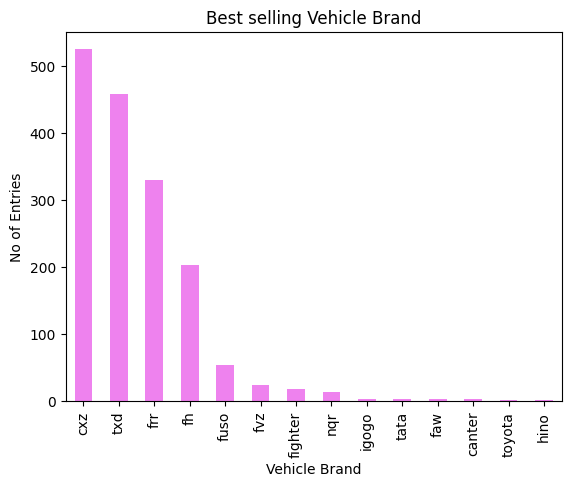

In [34]:
best_selling_brand_plot=best_selling_brand.plot(kind='bar',xlabel='Vehicle Brand',ylabel='No of Entries',title='Best selling Vehicle Brand',color='violet')
#plt.legend()
best_selling_brand_plot

Best selling brand with the total amount sold

cxz        3500500
frr        2128600
txd        1743600
fh         1078900
fuso        367300
fvz         195100
fighter     124000
nqr          52200
igogo        29000
faw          17000
tata         12700
toyota        7500
canter        6300
hino          5000
dtype: int64
Axes(0.125,0.11;0.775x0.77)


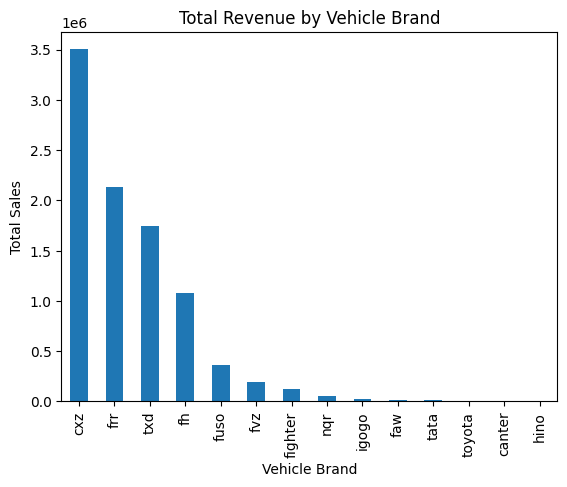

In [36]:
def brand_sales_total(df, brand_names):
    """
    Calculate total sales amount for a specific brand.

    Parameters:
    - df: pandas DataFrame with 'product' and 'amount' columns
    - brand_name: string or keyword to search in the 'product' column

    Returns:
    - Total amount generated by the brand
    """
    brands={}
    for brand_name in brand_names:
        mask = df['product'].str.contains(brand_name, case=False, na=False)
        total = df.loc[mask, 'amount'].sum()
        brands[brand_name]=total
    return pd.Series(brands).sort_values(ascending=False)

brand_names=['txd','cxz','tata','frr','fh','igogo','toyota','nqr','fuso','fvz','fighter','canter','hino','faw']

vbrand_sales=brand_sales_total(sales,brand_names)
print(vbrand_sales)


vbrand_sales_plot=vbrand_sales.plot(kind='bar',title='Total Revenue by Vehicle Brand',xlabel='Vehicle Brand',ylabel='Total Sales')
print(vbrand_sales_plot)